In [1]:
#cifer or imagenet
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# train split to validation
from sklearn.model_selection import train_test_split
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)

x_train = x_train.astype('float32') / 255 
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils.np_utils import to_categorical
N = 10
y_train = to_categorical(y_train, N)
y_valid = to_categorical(y_valid, N)
y_test = to_categorical(y_test, N)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(8750, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def Model():
  
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(3,3), strides = 4, padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2,2),  strides = 2, padding='same'))
    model.add(Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    model.add(Flatten())
    model.add(Dense(4096))
    model.add(Dropout(0.5))
    model.add(Dense(4096))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))
    return model


model = Model()

from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
# verbose = progress bar setting
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

# model.save_weights("mnist.hdf5") 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 8750 samples
Epoch 1/50
50000/50000 [==============================] - 27s 536us/step - loss: 2.2814 - acc: 0.1492 - val_loss: 2.0583 - val_acc: 0.1984
Epoch 2/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.8046 - acc: 0.3227 - val_loss: 1.6668 - val_acc: 0.3584
Epoch 3/50
50000/50000 [==============================] - 21s 416us/step - loss: 1.5408 - acc: 0.4437 - val_loss: 1.8021 - val_acc: 0.3667
Epoch 4/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.3769 - acc: 0.5154 - val_loss: 1.3137 - val_acc: 0.5141
Epoch 5/50
50000/50000 [==============================] - 21s 416us/step - loss: 1.2439 - acc: 0.5611 - val_loss: 1.1288 - val_acc: 0.6011
Epoch 6/50
50000/50000 [==============================] - 21s 416us/step - loss: 1.1389 - acc: 0.6025 - val_loss: 1.1767 - val_acc: 0.5807
Epoch 7/50
50000/50000 [==============================] - 21s 414us/s

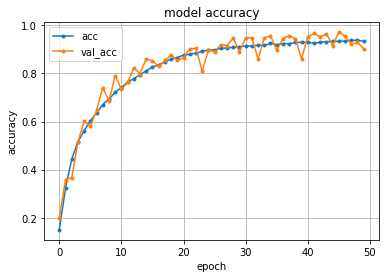

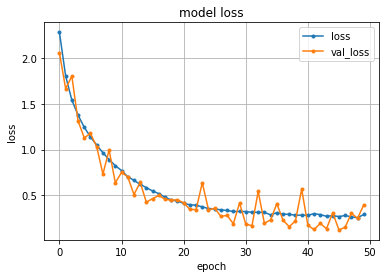

In [5]:
from matplotlib import pyplot as plt

# 精度のplot
plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()